In [955]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf
import talib

In [956]:
a1=yf.Ticker("TCS.NS")
df_Indian=a1.history(start="2013-01-01",end="2018-12-31")
a2=yf.Ticker("AMZN")
df_USA=a2.history(start="2013-01-01",end="2018-12-31")

In [957]:
rsi_Indian=talib.RSI(df_Indian['Close'].values,14)
rsi_USA=talib.RSI(df_USA['Close'].values,14)

In [958]:
upper_band_Indian,middle_band_Indian,lower_band_Indian=talib.BBANDS(df_Indian['Close'].values,20,2,2)
upper_band_USA,middle_band_USA,lower_band_USA=talib.BBANDS(df_USA['Close'].values,20,2,2)

In [959]:
df_Indian=df_Indian.iloc[:,:7]
df_Indian['Rsi']=rsi_Indian
df_Indian['Upper Band']=upper_band_Indian
df_Indian['Middle Band']=middle_band_Indian
df_Indian['Lower Band']=lower_band_Indian

In [960]:
df_USA=df_USA.iloc[:,:7]
df_USA['Rsi']=rsi_USA
df_USA['Upper Band']=upper_band_USA
df_USA['Middle Band']=middle_band_USA
df_USA['Lower Band']=lower_band_USA

In [961]:
position=0
net_pnl_Indian=[0]
middle_bool=False
for i in range(len(df_Indian)):
    if middle_bool==False and df_Indian['Close'][i]>df_Indian['Middle Band'][i]:
        middle_bool=True
    if middle_bool==False:
        continue
    if middle_bool==True and position==0:
        if df_Indian['Rsi'][i]>=50:
            position=1
            buyprice=df_Indian['Open'][i+1]
            stop_loss=df_Indian['Lower Band'][i]
            target_price=df_Indian['Upper Band'][i]
            continue
        else:
            continue
    if position==1:
        if df_Indian["Close"][i]>target_price or df_Indian['Close'][i]<stop_loss:
            position=0
            sellprice=df_Indian['Open'][i+1]
            middle_bool=False
            net_pnl_Indian.append(net_pnl_Indian[-1]+sellprice-buyprice)

In [962]:
position=0
net_pnl_USA=[0]
middle_bool=False
for i in range(len(df_USA)):
    if middle_bool==False and df_USA['Close'][i]>df_USA['Middle Band'][i]:
        middle_bool=True
    if middle_bool==False:
        continue
    if middle_bool==True and position==0:
        if df_USA['Rsi'][i]>=50: 
            position=1
            buyprice=df_USA['Open'][i+1]
            stop_loss=df_USA['Lower Band'][i]
            target_price=df_USA['Upper Band'][i]
            num+=1
            continue
        else:
            continue
    if position==1:
        if df_USA["Close"][i]>target_price or df_USA['Close'][i]<stop_loss:
            position=0
            sellprice=df_USA['Open'][i+1]
            middle_bool=False
            net_pnl_USA.append(net_pnl_USA[-1]+sellprice-buyprice)

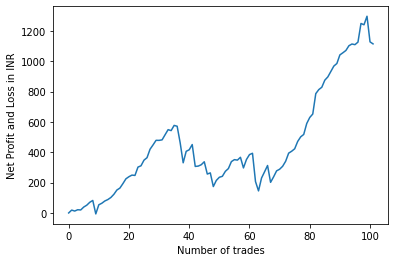

In [963]:
x_values=[]
for i in range(len(net_pnl_Indian)):
    x_values.append(i)
plt.plot(x_values,net_pnl_Indian)
plt.xlabel('Number of trades')
plt.ylabel('Net Profit and Loss in INR')
plt.show()  

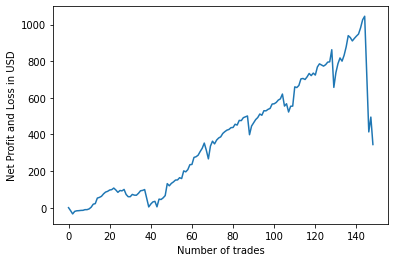

In [964]:
x_values=[]
for i in range(len(net_pnl_USA)):
    x_values.append(i)
plt.plot(x_values,net_pnl_USA)
plt.xlabel('Number of trades')
plt.ylabel('Net Profit and Loss in USD')
plt.show()  